In [ ]:
#data
docs = ['Where are you REALLY from?',
       'Go back to where you came from!',
       'What\'s my Chinese name?',
       'Are you from North or South Korea?',
       'They\'re so pretty for a black person',
       'Scientifically speaking, whites are superior to blacks',
       'Filipinos, Mexicans, they\'re all the same!',
       'I bet I know Japanese better than you lol',
       'You\re such a banana',
       'You don\'t act black at all, in fact I just think of you as white!',
       'Go find a god damned job and learn to speak English or I\'ll blind you with a piece of dental floss, you slanty-eyed mother fucker',
        'Y\'all are like the good kind of black people!',
       'That Jew belongs in an oven.',
        'She needs to get her Jap ass out.',
       'I love you so much, you\'re so cool!!!',
       'She\'s such a hard worker, and I really appreciate that.',
       'The state of this nation is a travesty and something needs to change.',
       'Obama was the greatest president this country has seen.',
       'Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention.',
       'I\'d like a nice bowl of ramen to hit the spot right now!',
       'Capitalism is an unsustainable and unjust idea, and we need to make changes before global warming destroys the world.',
       'The cutest member of BTS has to be V, but if we\'re going off sense of humor, Jin. However, if we\'re considering intellect, RM. Not that you asked but the best dancer is JHOPE and the guy I can\'t believe is my age is Jungkook.',
       'For people who have red-green colorblindness, the colors red and green look exactly the same.',
       'We hope to see you again!']

#labels
labels = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import Callback
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [82]:
#hyperparameters
max_features = 10000
max_length = 300

#split the data into train, test, and validation sets
x = np.array(pd.read_csv('dennisFiles/data/modified_expert_labeled_tweets.csv', usecols=[0]).values)
y = np.array(pd.read_csv('dennisFiles/data/modified_expert_labeled_tweets.csv', usecols=[1]).values)

x = np.array([ele[0] for ele in x])
y = np.array([ele[0] for ele in y])

#encode and pad
#t = Tokenizer()
#t.fit_on_texts(x_train)
#encoded_train = t.texts_to_matrix(x_train, mode='count')
#encoded_train = [hashing_trick(word, len(text_to_word_sequence(word))*1.3, hash_function='md5') for word in x_train]
encoded = [one_hot(word, max_features) for word in x]
padded = pad_sequences(encoded, maxlen=max_length, padding='post')

#split
train_portion = int(x.shape[0]*0.64)
test_portion = train_portion + int(x.shape[0]*0.2)

x_train = padded[0:train_portion]
y_train = y[0:train_portion]

x_test = padded[train_portion:test_portion]
y_test = y[train_portion:test_portion]

x_valid = padded[test_portion:]
y_valid = y[test_portion:]

#shape
model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#fit
model.fit(x_train, y_train, batch_size=1024, epochs=5)
#score = model.evaluate(padded_test, y_test, batch_size=96)

Epoch 1/5
4020/4020 [==============================] - 55s 14ms/step - loss: 0.6940 - acc: 0.5129
Epoch 2/5
4020/4020 [==============================] - 52s 13ms/step - loss: 0.6920 - acc: 0.5291
Epoch 3/5
4020/4020 [==============================] - 50s 13ms/step - loss: 0.6922 - acc: 0.5271
Epoch 4/5
4020/4020 [==============================] - 52s 13ms/step - loss: 0.6921 - acc: 0.5244
Epoch 5/5
4020/4020 [==============================] - 51s 13ms/step - loss: 0.6915 - acc: 0.5269


In [83]:
#test = pd.read_csv('dennisFiles/data/modified_expert_labeled_tweets.csv')

#x_test = test.ix[:, 0].values
#y_test = test.ix[:, 1].values

#encoded_test = t.texts_to_matrix(x_test, mode='count')
#encoded_test = [hashing_trick(word, len(text_to_word_sequence(word))*1.3, hash_function='md5') for word in x_test]
#encoded_test = [one_hot(word, max_features) for word in x_test]
#padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

y_pred = [1 if element >= 0.5 else 0 for element in model.predict(x_test)]
print(set(y_test)-set(y_pred))
print(classification_report(y_test, y_pred))

{0}
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1240
          1       0.01      1.00      0.03        16

avg / total       0.00      0.01      0.00      1256



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


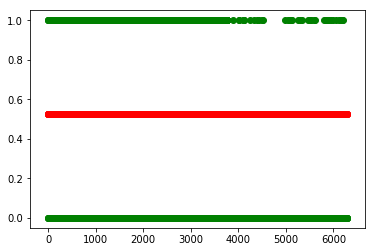

In [47]:
results = model.predict(padded_test)
plt.scatter(range(len(results)),results,c='r')
plt.scatter(range(len(y_test)),y_test,c='g')
plt.show()

In [49]:

with open('dennisFiles/data/test.csv', mode='a') as outputcsv: 
    writeCSV = csv.writer(outputcsv, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, lineterminator = '\n')
    for row in encoded_test:
        writeCSV.writerow(row)